## Image compression using clustering

### Create k-means algorithm with squared-ℓ2 norm and ℓ1 norm as a metric on three pictures. Run k-means implementation with these pictures, with several different k = 2, 4, 8. 

The number of iteration and elapsed time are given after running the different k values for each image below.

### Create the kmeans algorithm 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread
from scipy.sparse import csc_matrix
import time
import copy

%matplotlib inline

def initialize_centers(X, k):
    # X is dataset and k is no. of cluster
    dim = X.shape[1]
    return np.random.uniform(0,255, size=(k, dim))

def compute_dist(X, centers, norm):
    m = X.shape[0] # no of pixel
    k = len(centers)   
    c_xi_diff = np.empty((m, k))
    # calculate the L1 norm distance for xi from each centers
    if norm == 1:
        for i in range(m):
            d_xi = np.linalg.norm(X[i, :] - centers, ord=1, axis=1)
            c_xi_diff[i, :] = d_xi
    # calculate the squared L2 norm distance for xi from each centers
    if norm == 2:
        for i in range(m):
            d_xi = np.linalg.norm(X[i, :] - centers, ord=2, axis=1)
            c_xi_diff[i, :] = d_xi**2
 
    return c_xi_diff


def assign_cluster_labels(D):
    # assign xi to cluster based on the smallest distance 
    return np.argmin(D, axis=1) 

def recompute_centroids(X, y, norm):
    # X is dataset, y is labels
    m, d = X.shape
    k = max(y) + 1
    c = np.empty((k, d))
    # use median for l1 norm
    if norm == 1:
        for j in range(k):
            c[j, :d] = np.median(X[y == j, :], axis=0)
    # use average for l2 norm
    if norm == 2:
        for j in range(k):
            # Compute the new center of cluster j by taking the mean of all xi assigned 
            c[j, :d] = np.mean(X[y == j, :], axis=0)
    return c

def kmeans(X, k, max_iterno, norm):
    # set norm = 1 (l1 norm) or 2 (squared-l2 norm) 
    c = initialize_centers(X, k)
    is_c_adjusted = False
    i = 1
    start = time.time()
    while (not is_c_adjusted) and (i <= max_iterno):
        # record the old center
        c_old = copy.deepcopy(c)
        # Assign the cluster to data points
        dist = compute_dist(X, c, norm)
        labels = assign_cluster_labels(dist)
        # Recompute the centers 
        c = recompute_centroids(X, labels, norm)
        # Check if the centers are adjusted
        is_c_adjusted = (sorted([tuple(x) for x in c_old]) == (sorted([tuple(x) for x in c])))
        print("--iteration %d " % i)
        i += 1
    end = time.time()
    print("elapsed time: %f seconds" %  float(end - start))
    return labels
        

### Run Kmeans on  "hestain.bmp" with  different k = 2, 4, 8.

Shape of the matrix obtained by reading the image
(224, 298, 3)


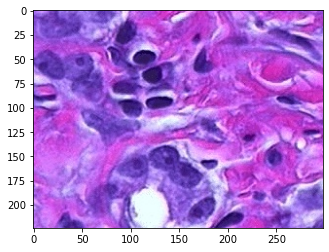

Shape of the transformed matrix 
(66752, 3)


In [5]:
# Load the image as array 
image_arr = imread("data/hestain.bmp")
# Shape of Matrix
print("Shape of the matrix obtained by reading the image")
print(image_arr.shape)
plt.rcParams["figure.autolayout"] = False
plt.rcParams["figure.figsize"] = [10.00, 4.0]
# Display the image 
imgplot = plt.imshow(image_arr)
plt.show()
# Transform the matrix from "3-D" to flattened "2-D"
W , H , L = image_arr.shape
image_transformed = np.reshape(image_arr, ((W*H), L), order = "C")
print("Shape of the transformed matrix ")
print(image_transformed.shape)

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
--iteration 19 
--iteration 20 
--iteration 21 
--iteration 22 
--iteration 23 
--iteration 24 
--iteration 25 
--iteration 26 
--iteration 27 
--iteration 28 
--iteration 29 
elapsed time: 63.298430 seconds
Compressed image with k = 2


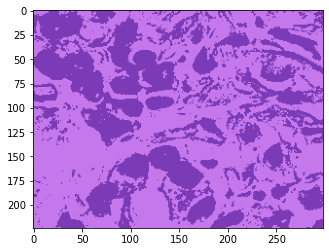

In [6]:
## k = 2 ##
# set seed 
np.random.seed(101)
labels = kmeans(image_transformed, 2, 200, 2)
# Get each cluster j : centers (labelled)    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k2 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k2 = image_k2.astype(dtype='uint8')
print("Compressed image with k = 2")
plt.imshow(image_k2)
plt.show()

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
--iteration 19 
--iteration 20 
--iteration 21 
--iteration 22 
--iteration 23 
--iteration 24 
--iteration 25 
--iteration 26 
--iteration 27 
--iteration 28 
elapsed time: 50.083345 seconds
Compressed image with k = 4


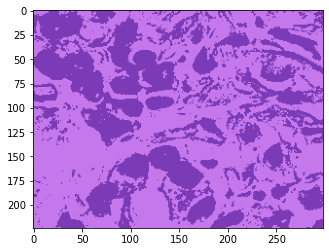

In [7]:
## k = 4 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 4, 200, 2)
# Get each cluster j : centers (labelled)    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k4 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k4 = image_k4.astype(dtype='uint8')
print("Compressed image with k = 4")
plt.imshow(image_k4)
plt.show()

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
--iteration 19 
--iteration 20 
--iteration 21 
--iteration 22 
--iteration 23 
--iteration 24 
--iteration 25 
--iteration 26 
--iteration 27 
--iteration 28 
elapsed time: 46.770766 seconds
Compressed image with k = 6


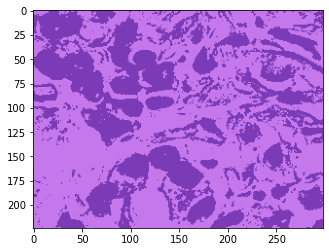

In [8]:
## k = 8 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 6, 200, 2)
# Get the cluster centers    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
    
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k8 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k8 = image_k8.astype(dtype='uint8')
print("Compressed image with k = 6")
plt.imshow(image_k8)
plt.show()

#### Summary

For "hestain.bmp image"
-  k = 2: it takes 29 iterations and elapsed 31 seconds
-  k = 4: it takes 28 iterations and elapsed 30 seconds
-  k = 6: it takes 28 iterations and elapsed 30 seconds

Compressed image with k = 2, 4, 6


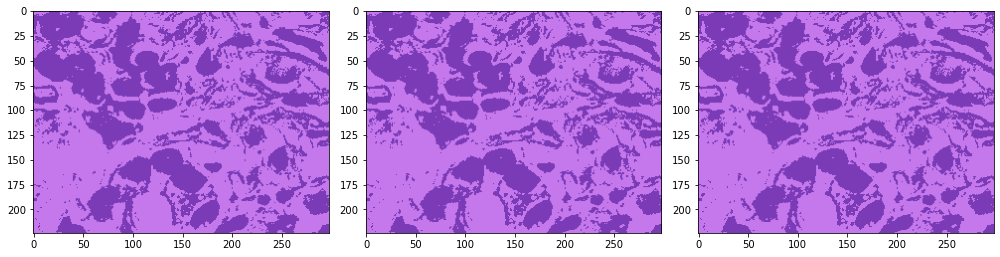

In [9]:
plt.rcParams["figure.figsize"] = [14.00, 7.0]
plt.rcParams["figure.autolayout"] = True
f, axarr = plt.subplots(1,3)
axarr[0].imshow(image_k2)
axarr[1].imshow(image_k4)
axarr[2].imshow(image_k8)
print("Compressed image with k = 2, 4, 6")
plt.show()

### Run Kmeans on  "football.bmp" with  different k = 2, 4, 8.

Shape of the matrix obtained by reading the image
(412, 620, 3)


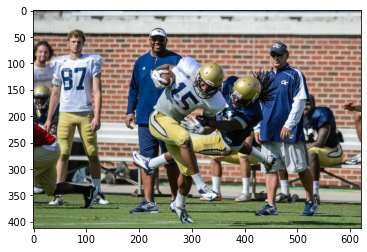

In [10]:
# Load the image as array 
image_arr = imread("data/football.bmp")
# Shape of Matrix
print("Shape of the matrix obtained by reading the image")
print(image_arr.shape)
# Display the image 
plt.rcParams["figure.autolayout"] = False
plt.rcParams["figure.figsize"] = [10.00, 4.0]
imgplot = plt.imshow(image_arr)
plt.show()

In [11]:
# Transform the matrix from "3-D" to flattened "2-D"
W , H , L = image_arr.shape
image_transformed = np.reshape(image_arr, ((W*H), L), order = "C")
print("Shape of the transformed matrix ")
print(image_transformed.shape)

Shape of the transformed matrix 
(255440, 3)


--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
elapsed time: 105.839039 seconds
Compressed image with k = 2


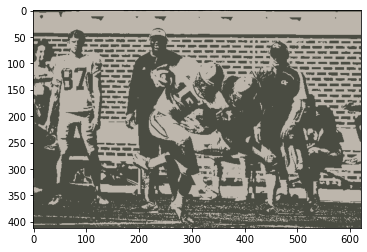

In [12]:
## k = 2 ##
# set seed 
np.random.seed(111)
labels = kmeans(image_transformed, 2, 200, 2)
# Get each cluster j : centers (labelled)    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k2 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k2 = image_k2.astype(dtype='uint8')
print("Compressed image with k = 2")
plt.imshow(image_k2)
plt.show()

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
--iteration 19 
--iteration 20 
--iteration 21 
--iteration 22 
--iteration 23 
--iteration 24 
--iteration 25 
--iteration 26 
--iteration 27 
elapsed time: 130.018123 seconds
Compressed image with k = 4


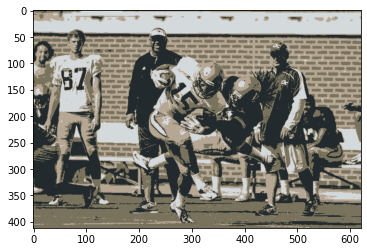

In [13]:
# Get labels with k = 4

np.random.seed(111)
labels = kmeans(image_transformed, 4, 200, 2)
# Get the cluster centers    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
    
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k4 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k4 = image_k4.astype(dtype='uint8')
print("Compressed image with k = 4")
plt.imshow(image_k4)
plt.show()

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
--iteration 19 
--iteration 20 
--iteration 21 
--iteration 22 
--iteration 23 
--iteration 24 
--iteration 25 
--iteration 26 
--iteration 27 
--iteration 28 
--iteration 29 
--iteration 30 
--iteration 31 
--iteration 32 
--iteration 33 
--iteration 34 
--iteration 35 
--iteration 36 
--iteration 37 
--iteration 38 
--iteration 39 
--iteration 40 
--iteration 41 
--iteration 42 
--iteration 43 
--iteration 44 
--iteration 45 
--iteration 46 
--iteration 47 
--iteration 48 
--iteration 49 
--iteration 50 
--iteration 51 
--iteration 52 
--iteration 53 
elapsed time: 253.479592 seconds
Compressed image with k = 8


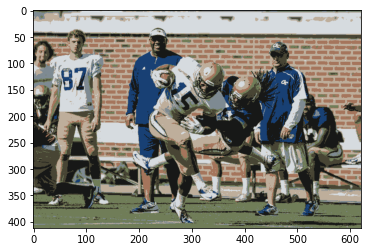

In [14]:
## k = 8 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 8, 200, 2)
# Get the cluster centers    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
    
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k8 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k8 = image_k8.astype(dtype='uint8')
print("Compressed image with k = 8")
plt.imshow(image_k8)
plt.show()

#### Summary

For "football.bmp image"
-  k = 2: it takes 18 iterations and elapsed 74 seconds
-  k = 4: it takes 27 iterations and elapsed 103 seconds
-  k = 8: it takes 53 iterations and elapsed 244 seconds

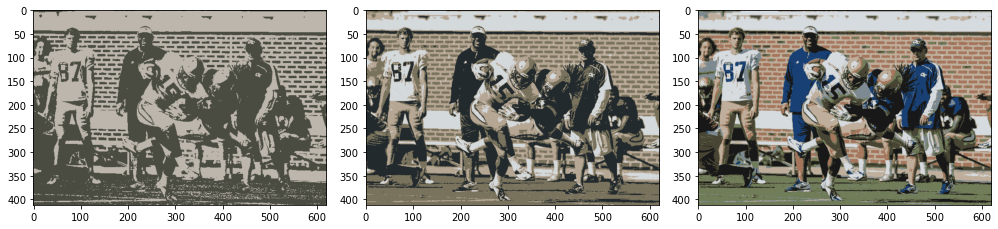

In [15]:
plt.rcParams["figure.figsize"] = [14.00, 7.0]
plt.rcParams["figure.autolayout"] = True
f, axarr = plt.subplots(1,3)
axarr[0].imshow(image_k2)
axarr[1].imshow(image_k4)
axarr[2].imshow(image_k8)
plt.show()

### Run Kmeans on  "parks.jpg" with  different k = 2, 4, 8.

Shape of the matrix obtained by reading the image
(426, 640, 3)


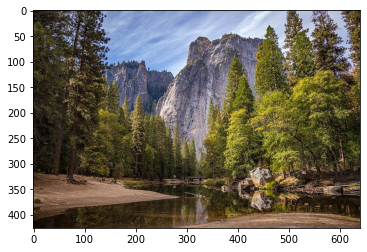

Shape of the transformed matrix 
(272640, 3)


In [16]:
# Load the image as array 
image_arr = imread("data/parks.jpg")
# Shape of Matrix
print("Shape of the matrix obtained by reading the image")
print(image_arr.shape)
# Display the image 
plt.rcParams["figure.autolayout"] = False
plt.rcParams["figure.figsize"] = [10.00, 4.0]
imgplot = plt.imshow(image_arr)
plt.show()
# Transform the matrix from "3-D" to flattened "2-D"
W , H , L = image_arr.shape
image_transformed = np.reshape(image_arr, ((W*H), L), order = "C")
print("Shape of the transformed matrix ")
print(image_transformed.shape)

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
elapsed time: 85.047018 seconds
Compressed image with k = 2


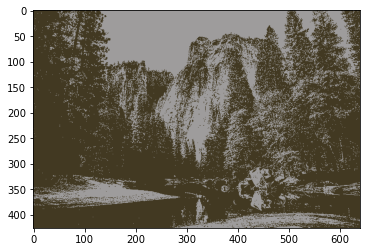

In [17]:
## k = 2 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 2, 200, 2)
# Get each cluster j : centers (labelled)    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k2 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k2 = image_k2.astype(dtype='uint8')
print("Compressed image with k = 2")
plt.imshow(image_k2)
plt.show()

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
--iteration 19 
--iteration 20 
--iteration 21 
--iteration 22 
--iteration 23 
--iteration 24 
--iteration 25 
--iteration 26 
--iteration 27 
--iteration 28 
--iteration 29 
--iteration 30 
--iteration 31 
--iteration 32 
--iteration 33 
--iteration 34 
--iteration 35 
--iteration 36 
--iteration 37 
--iteration 38 
--iteration 39 
elapsed time: 203.537372 seconds
Compressed image with k = 4


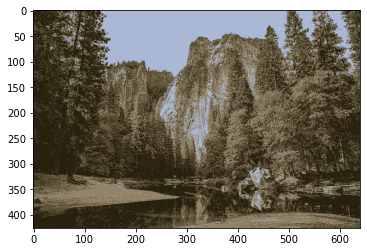

In [18]:
## k = 4 ##
# set seed 
np.random.seed(111)
labels = kmeans(image_transformed, 4, 200, 2)
# Get the cluster centers    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
    
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k4 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k4 = image_k4.astype(dtype='uint8')
print("Compressed image with k = 4")
plt.imshow(image_k4)
plt.show()

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
--iteration 19 
--iteration 20 
--iteration 21 
--iteration 22 
--iteration 23 
--iteration 24 
--iteration 25 
--iteration 26 
--iteration 27 
--iteration 28 
--iteration 29 
--iteration 30 
--iteration 31 
--iteration 32 
--iteration 33 
--iteration 34 
--iteration 35 
--iteration 36 
--iteration 37 
--iteration 38 
--iteration 39 
--iteration 40 
--iteration 41 
--iteration 42 
--iteration 43 
--iteration 44 
--iteration 45 
--iteration 46 
--iteration 47 
--iteration 48 
--iteration 49 
--iteration 50 
--iteration 51 
--iteration 52 
--iteration 53 
--iteration 54 
--iteration 55 
--iteration 56 
--iteration 57 
--iteration 58 
--iteration 59 
--iteration 60 
elapsed time: 282.010007 seconds
Compressed image

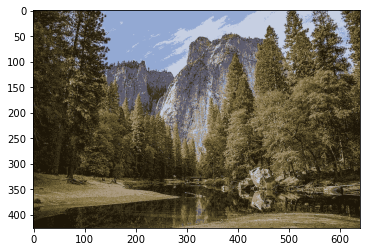

In [19]:
## k = 8 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 8, 200, 2)
# Get the cluster centers    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
    
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k8 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k8 = image_k8.astype(dtype='uint8')
print("Compressed image with k = 8")
plt.imshow(image_k8)
plt.show()

#### Summary

For "parks.jpg image"
-  k = 2: it takes 18 iterations and elapsed 74 seconds
-  k = 4: it takes 39 iterations and elapsed 176 seconds
-  k = 8: it takes 60 iterations and elapsed 265 seconds

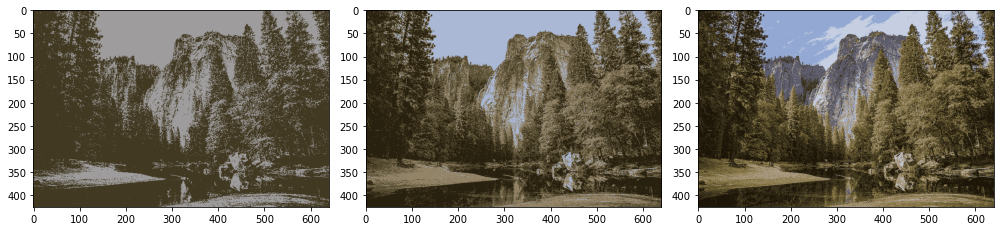

In [20]:
plt.rcParams["figure.figsize"] = [14.00, 7.0]
plt.rcParams["figure.autolayout"] = True
f, axarr = plt.subplots(1,3)
axarr[0].imshow(image_k2)
axarr[1].imshow(image_k4)
axarr[2].imshow(image_k8)
plt.show()

## Run k-means with the Manhattan distance (or ℓ1 distance), comparing the results from l2-norm 

By comparing the images, it seems that using squared l2 norm gives a better quality for images with colours that are more different like the football image. While manhattan distance works better for image with very similar colour like the hestain image.

The script and images are given below.

### 2.1 Run Kmeans on  "hestain.bmp" with  different k = 2, 4, 8 (L1 norm)

Shape of the matrix obtained by reading the image
(224, 298, 3)


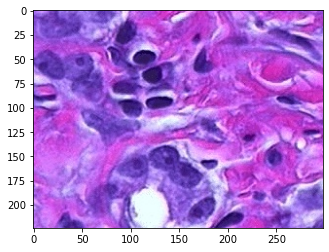

Shape of the transformed matrix 
(66752, 3)


In [21]:
# Load the image as array 
image_arr = imread("data/hestain.bmp")
# Shape of Matrix
print("Shape of the matrix obtained by reading the image")
print(image_arr.shape)
# Display the image 
plt.rcParams["figure.autolayout"] = False
plt.rcParams["figure.figsize"] = [10.00, 4.0]
imgplot = plt.imshow(image_arr)
plt.show()
# Transform the matrix from "3-D" to flattened "2-D"
W , H , L = image_arr.shape
image_transformed = np.reshape(image_arr, ((W*H), L), order = "C")
print("Shape of the transformed matrix ")
print(image_transformed.shape)

In [22]:
## k = 2 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 2, 200, 1)
# Get each cluster j : centers (labelled)    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k2 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k2 = image_k2.astype(dtype='uint8')

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
elapsed time: 8.675187 seconds


In [23]:
## k = 4 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 4, 200, 1)
# Get the cluster centers    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
    
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k4 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k4 = image_k4.astype(dtype='uint8')


--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
--iteration 19 
--iteration 20 
--iteration 21 
elapsed time: 17.244821 seconds


In [24]:
## k = 8 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 6, 200, 1)
# Get the cluster centers    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
    
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k8 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k8 = image_k8.astype(dtype='uint8')

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
--iteration 19 
--iteration 20 
--iteration 21 
--iteration 22 
--iteration 23 
--iteration 24 
--iteration 25 
--iteration 26 
--iteration 27 
--iteration 28 
--iteration 29 
--iteration 30 
--iteration 31 
--iteration 32 
--iteration 33 
--iteration 34 
--iteration 35 
--iteration 36 
--iteration 37 
--iteration 38 
--iteration 39 
--iteration 40 
--iteration 41 
--iteration 42 
elapsed time: 39.716703 seconds


Compressed image with k = 2, 4, 6


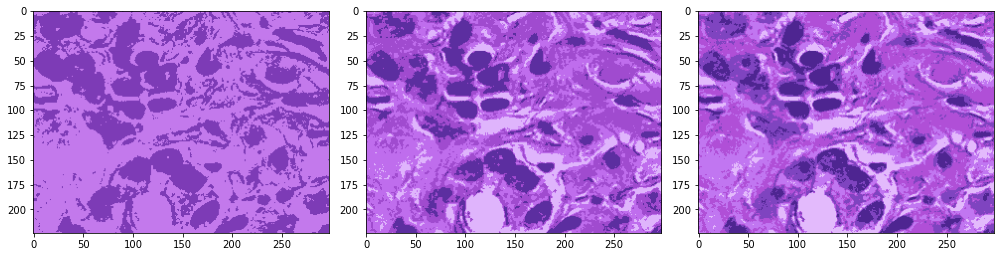

In [25]:
plt.rcParams["figure.figsize"] = [14.00, 7.0]
plt.rcParams["figure.autolayout"] = True
f, axarr = plt.subplots(1,3)
axarr[0].imshow(image_k2)
axarr[1].imshow(image_k4)
axarr[2].imshow(image_k8)
print("Compressed image with k = 2, 4, 6")
plt.show()

### 2.2 Run Kmeans on  "hestain.bmp" with  different k = 2, 4, 8 (L1 norm)

Shape of the matrix obtained by reading the image
(412, 620, 3)


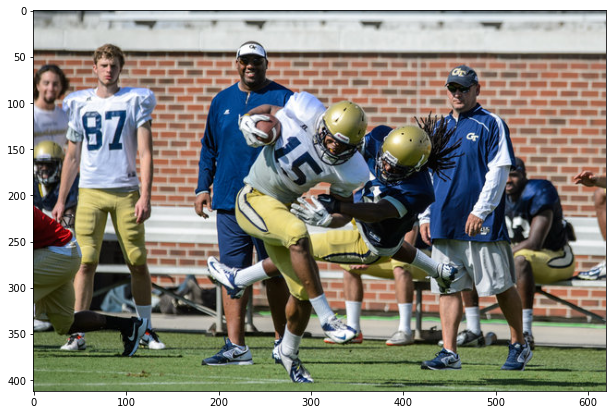

Shape of the transformed matrix 
(255440, 3)


In [26]:
# Load the image as array 
image_arr = imread("data/football.bmp")
# Shape of Matrix
print("Shape of the matrix obtained by reading the image")
print(image_arr.shape)
plt.rcParams["figure.autolayout"] = False
# Display the image 
imgplot = plt.imshow(image_arr)
plt.show()
# Transform the matrix from "3-D" to flattened "2-D"
W , H , L = image_arr.shape
image_transformed = np.reshape(image_arr, ((W*H), L), order = "C")
print("Shape of the transformed matrix ")
print(image_transformed.shape)

In [27]:
## k = 2 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 2, 200, 1)
# Get each cluster j : centers (labelled)    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k2 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k2 = image_k2.astype(dtype='uint8')

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
elapsed time: 54.718190 seconds


In [28]:
## k = 4 ##
# set seed 
np.random.seed(111)
labels = kmeans(image_transformed, 4, 200, 1)
# Get the cluster centers    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
    
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k4 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k4 = image_k4.astype(dtype='uint8')

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
elapsed time: 27.911778 seconds


In [29]:
## k = 8 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 8, 200, 1)
# Get the cluster centers    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
    
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k8 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k8 = image_k8.astype(dtype='uint8')

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
elapsed time: 42.867202 seconds


Compressed image with k = 2, 4, 8


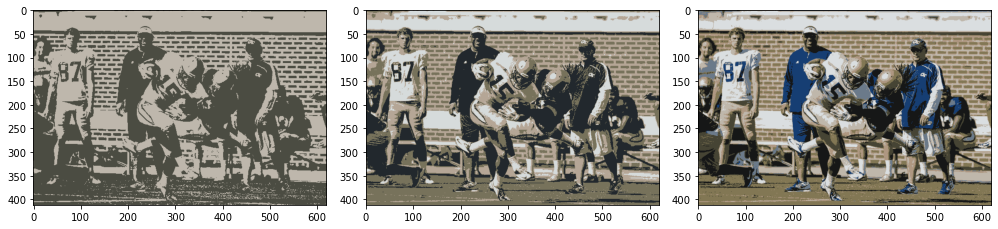

In [30]:
plt.rcParams["figure.figsize"] = [14.00, 7.0]
plt.rcParams["figure.autolayout"] = True
f, axarr = plt.subplots(1,3)
axarr[0].imshow(image_k2)
axarr[1].imshow(image_k4)
axarr[2].imshow(image_k8)
print("Compressed image with k = 2, 4, 8")
plt.show()

### 2.3 Run Kmeans on  "parks.jpg" with  different k = 2, 4, 8 (L1 norm)

Shape of the matrix obtained by reading the image
(426, 640, 3)


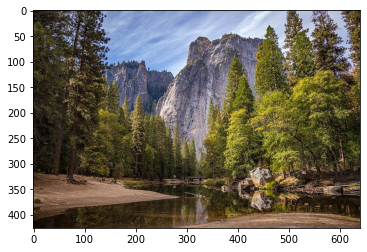

Shape of the transformed matrix 
(272640, 3)


In [31]:
# Load the image as array 
image_arr = imread("data/parks.jpg")
# Shape of Matrix
print("Shape of the matrix obtained by reading the image")
print(image_arr.shape)
plt.rcParams["figure.autolayout"] = False
plt.rcParams["figure.figsize"] = [10.00, 4.0]
# Display the image 
imgplot = plt.imshow(image_arr)
plt.show()
# Transform the matrix from "3-D" to flattened "2-D"
W , H , L = image_arr.shape
image_transformed = np.reshape(image_arr, ((W*H), L), order = "C")
print("Shape of the transformed matrix ")
print(image_transformed.shape)

In [32]:
## k = 2 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 2, 200, 1)
# Get each cluster j : centers (labelled)    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k2 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k2 = image_k2.astype(dtype='uint8')

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
elapsed time: 28.167389 seconds


In [33]:
## k = 4 ##
# set seed 
np.random.seed(111)
labels = kmeans(image_transformed, 4, 200, 1)
# Get the cluster centers    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
    
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k4 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k4 = image_k4.astype(dtype='uint8')


--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
elapsed time: 54.991538 seconds


In [34]:
## k = 8 ##
# set seed 
np.random.seed(11)
labels = kmeans(image_transformed, 8, 200, 1)
# Get the cluster centers    
ind = np.column_stack((image_transformed, labels))
centers = {}
for i in set(labels):
    c = ind[ind[:,3] == i].mean(axis=0)
    centers[i] = c[:3]
    
# Replace the datapoints with the cluster centers
image_clustered = np.array([centers[i] for i in labels])
# Reshaped to display image
W , H , L = image_arr.shape
image_k8 = np.reshape(image_clustered, (W , H , L ), order="C")
image_k8 = image_k8.astype(dtype='uint8')

--iteration 1 
--iteration 2 
--iteration 3 
--iteration 4 
--iteration 5 
--iteration 6 
--iteration 7 
--iteration 8 
--iteration 9 
--iteration 10 
--iteration 11 
--iteration 12 
--iteration 13 
--iteration 14 
--iteration 15 
--iteration 16 
--iteration 17 
--iteration 18 
--iteration 19 
--iteration 20 
--iteration 21 
--iteration 22 
--iteration 23 
--iteration 24 
--iteration 25 
--iteration 26 
--iteration 27 
--iteration 28 
--iteration 29 
--iteration 30 
--iteration 31 
elapsed time: 126.036627 seconds


Compressed image with k = 2, 4, 8


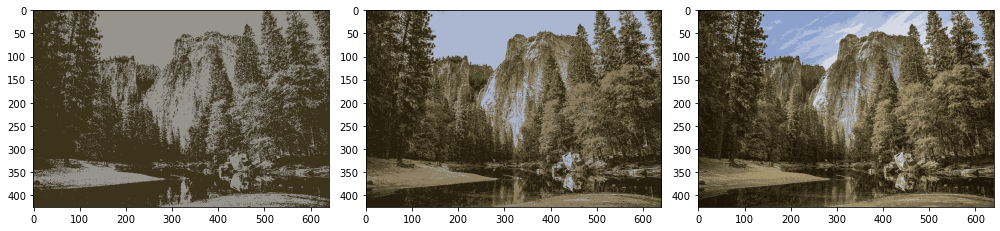

In [35]:
plt.rcParams["figure.figsize"] = [14.00, 7.0]
plt.rcParams["figure.autolayout"] = True
f, axarr = plt.subplots(1,3)
axarr[0].imshow(image_k2)
axarr[1].imshow(image_k4)
axarr[2].imshow(image_k8)
print("Compressed image with k = 2, 4, 8")
plt.show()